# **CS 235 - Data Mining Techniques**

Team Members -

1.   **Aryan Ramachandra**, Student ID - **862545919**
2.   **Saransh Gupta**, Student ID - **862548920**




## **Installing Libraries**


This line installs the UC Irvine dataset Library into the notebook. This ensures that the dataset can be downloaded directly into the notebook. Thus making the file run on any python environment.

### **References**

[UCIrvine](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) - to download and import the dataset directly into the notebook and also some syntax to extract features and the target class in the dataset.

In [2]:
!pip install ucimlrepo

## **Importing the Required Libraries**

The following libraries were used to perfom the tasks mentioned in the project:

- `pandas`: Library for data manipulation and analysis, especially for working with DataFrames.
- `numpy`: Library for numerical computations, providing support for arrays and mathematical functions.
- `matplotlib.pyplot`: Library for creating static, animated, and interactive visualizations in Python.
- `ucimlrepo`: Fetches datasets from the UCI Machine Learning Repository.
- `seaborn`: Data visualization library based on matplotlib, used for creating attractive and informative statistical graphics.
- `sklearn.metrics` and `sklearn.model_selection`: Provide tools for evaluating classification performance (e.g., confusion matrix, F1 score) and implementing stratified k-fold cross-validation.


### **References**

[ScikitLearn](https://scikit-learn.org/1.5/modules/model_evaluation.html) - to get the syntax and understand Stratified K-fold Evaluation



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from scipy.linalg import eigh
from sklearn.metrics import silhouette_samples, silhouette_score


In [4]:

dataset = fetch_ucirepo(id=17)
df = pd.DataFrame(data=dataset.data.features, columns=dataset.data.feature_names)
df['target'] = dataset.data.targets


total_rows = df.shape[0]
print('Total number of rows in the dataset:', total_rows)

Total number of rows in the dataset: 569


In [5]:
y = df['target']
X = df.drop('target', axis=1)

# Question 1: K Means implementation


K Means is a clustering algorithm used to assign each n data points a cluster that is nearest to it. We have implemented K Means++ and K Means as part of this assignment.

Following are the steps involved in it:
1. K points initialization: We have 2 functions here `get_random_k_points` to get k random points for LLoyd algorithm. We have `get_k_means_plus_plus_points` to get k points as per research paper mentioned in the assignment. Here we started from a single random point marked it as cluster center and then iteratively selected remaining k-1 centers based on the probability of the distance. After selection of each point we updated the distance function having minimum value.
2. K Means clustering: This is implemented under `k_means_clustering` function takes inital k centers by either way described above and assigns each data point to the nearest cluster using the `assign_clusters` function and updates the cluster centers to the mean of the assigned points using update_centers. This process repeats until there is no change in cluster center. The function returns the final cluster centers and the labels indicating which cluster each data point belongs to.
3. Silhouette Score: We are evaluating cluster quality via Silhouette Coefficient. We did 10 iteration for each method and had mean and standard deviation score for each method and used it for plotting. These are implemented in `get_mean_std_silhouette_k_means` and `get_mean_std_silhouette_k_means_plus_plus`
4. Plotting: For plotting we plotted bar charts for representing silhouette score for each k using both K means and K means ++ initialization.

In [16]:

def get_random_k_points(X, k):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)

    random_k_points = X.sample(n=k)

    return random_k_points.to_numpy()

In [9]:
def get_k_means_plus_plus_points(X, k):

    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    data = X.to_numpy()
    data_points = len(data)

    first_center_idx = np.random.choice(data_points)
    cluster_centers = [data[first_center_idx]]

    distances = np.zeros(data_points)
    for data_point in range(data_points):
        distances[data_point] = np.linalg.norm(data[data_point] - data[first_center_idx])**2


    for _ in range(k - 1):
        probability = distances / np.sum(distances)
        new_cluster_idx = np.random.choice(data_points, p=probability)
        cluster_centers.append(data[new_cluster_idx])

        for data_point in range(data_points):
            new_cluster_distance = np.linalg.norm(data[data_point] - data[new_cluster_idx])**2
            distances[data_point] = min(distances[data_point], new_cluster_distance)

    return np.array(cluster_centers)

In [10]:
# Assign each point to nearest cluster
def assign_clusters(data, centers):
  clusters = np.zeros(len(data), dtype=int)
  for i, point in enumerate(data):
    closest_cluster = -1
    min_distance = float('inf')
    for j, center in enumerate(centers):
      distance = np.linalg.norm(point - center)
      if distance < min_distance:
        min_distance = distance
        closest_cluster = j
    clusters[i] = closest_cluster
  return clusters

In [11]:
# Update cluster centroids for new clusters
def update_centers(data, labels, k):
  new_centers = []
  for cluster_idx in range(k):
    cluster_points = data[labels == cluster_idx]
    if cluster_points.size > 0:
      new_centers.append(cluster_points.mean(axis=0))
  return np.array(new_centers)

In [12]:
# K Means clustering as described above
def k_means_clustering(data, initial_centers):
  centers=initial_centers.copy()
  while True:
    labels = assign_clusters(data, centers)
    new_centers = update_centers(data, labels, len(centers))
    if np.array_equal(centers, new_centers):
      break
    centers = new_centers
  return centers, labels


In [13]:
# This gets Silhouette score for LLoyd algorithm over 10 iteration
def get_mean_std_silhouette_k_means(data, k):

    if not isinstance(data, np.ndarray):
        data = data.to_numpy()

    silhouette_scores = []
    for _ in range(10):
        centers, labels = k_means_clustering(data, get_random_k_points(data, k))
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    return np.mean(silhouette_scores), np.std(silhouette_scores)


In [14]:
# This gets Silhouette score for K Means++ algorithm for 10 iteration
def get_mean_std_silhouette_k_means_plus_plus(data, k):

    if not isinstance(data, np.ndarray):
        data = data.to_numpy()

    silhouette_scores = []
    for _ in range(10):
        centers, labels = k_means_clustering(data, get_k_means_plus_plus_points(data, k))
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    return np.mean(silhouette_scores), np.std(silhouette_scores)


## Question 1: Plotting

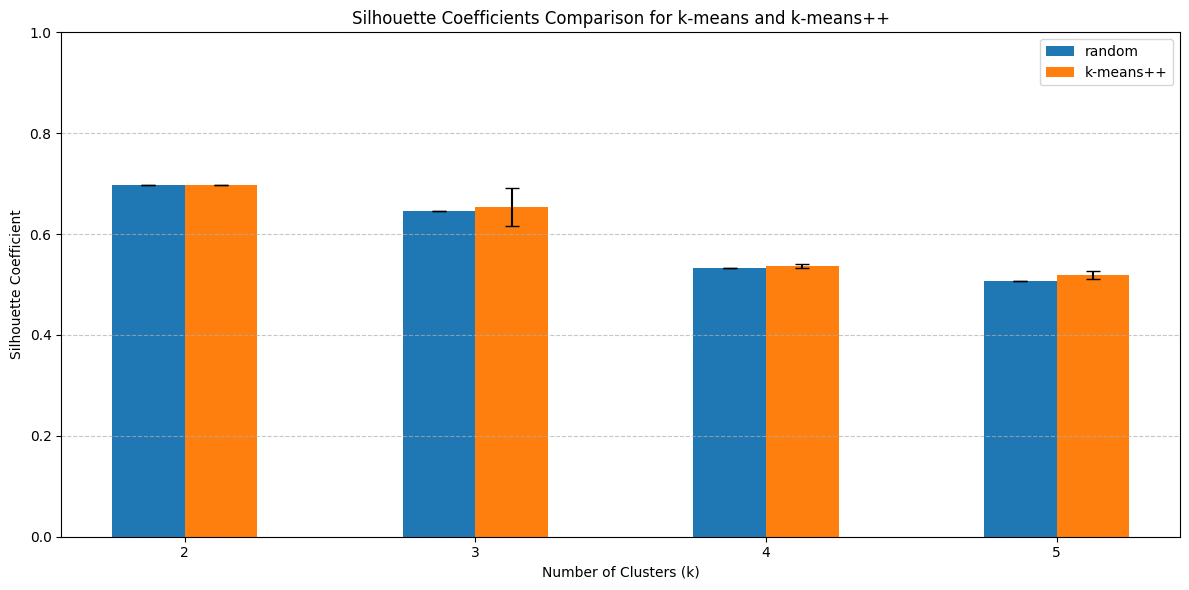

In [173]:
# For every K from 1 to 5 computing Silhouette Score for k-means and k-means++
mean_silhouette_k_means = []
std_silhouette_k_means = []
mean_silhouette_k_means_plus_plus = []
std_silhouette_k_means_plus_plus = []

for k in range(2, 6):
    # Get silhouette scores for k-means
    mean_k_means, std_k_means = get_mean_std_silhouette_k_means(X, k)
    mean_silhouette_k_means.append(mean_k_means)
    std_silhouette_k_means.append(std_k_means)

    # Get silhouette scores for k-means++
    mean_k_means_plus_plus, std_k_means_plus_plus = get_mean_std_silhouette_k_means_plus_plus(X, k)
    mean_silhouette_k_means_plus_plus.append(mean_k_means_plus_plus)
    std_silhouette_k_means_plus_plus.append(std_k_means_plus_plus)

# Plotting the results
k_values = [str(k) for k in range(2, 6)]  # X-axis labels

x = np.arange(len(k_values))  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=(12, 6))

# Bar plot for k-means
plt.bar(
    x - width / 2,
    mean_silhouette_k_means,
    yerr=std_silhouette_k_means,
    width=width,
    capsize=5,
    label="random",
    color="#1f77b4",
)

# Bar plot for k-means++
plt.bar(
    x + width / 2,
    mean_silhouette_k_means_plus_plus,
    yerr=std_silhouette_k_means_plus_plus,
    width=width,
    capsize=5,
    label="k-means++",
    color="#ff7f0e",
)

# Add labels and formatting
plt.title("Silhouette Coefficients Comparison for k-means and k-means++")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Coefficient")
plt.xticks(x, k_values)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


## Results:

*   For k=2: Both k-means and k-means++ have very similar, high silhouette coefficients, suggesting good cluster quality with minimal differences in performance for this value of k
* For k=3: K-means++ slightly outperforms k-means, with a higher silhouette coefficient and a noticeable error bar (indicating potential variability in cluster quality for k-means++).
* For k=4: Both methods have comparable silhouette coefficients, suggesting similar clustering quality.
* For k=5: K-means performs marginally better than k-means++, but the difference is minimal.

## Conclusion:

* K-means++ generally provides better or comparable cluster quality to k-means, especially at lower k, due to its improved initialization strategy.
* As k increases, the quality difference between k-means and k-means++ diminishes, suggesting that initialization becomes less critical as the number of clusters grows.
* The slight variations in performance and error suggest that the dataset may have inherent noise or structure that both methods are capturing similarly.

### **References**



*   Kmeans - https://link.springer.com/referenceworkentry/10.1007/978-0-387-30164-8_425
*   K means ++ - https://dl.acm.org/doi/10.5555/1283383.1283494



# Question 2: DB Scan implementation

DB Scan is powerful clustering algorithm which divides every point to as eiter core, or non core points based on two parameters: epsilon (ε) and minimum points (minPts). Core points have at least minPts neighbors within a radius of ε, and non cores dont. Clusters expand from core points, recursively adding reachable points. DBSCAN scans every point and based on minPts and epsilon mark points as part of same cluster as that of the starting point.
We have implemented below:
1. `implement_db_scan`: This is the main function which takes a point and see if has neighbors more than or equal to min points and assign same clusters to its neighbor. Getting neighbor is done by `get_neighboring_points` function and assigning cluster to neighbor and expanding if core point is done by `expand_cluster`.
2. Silhouette Score: This is implemented under `get_mean_std_silhouette_db_scan` where we take 10 iterations and in each iteration shuffle the data and run the db scan algorithm. Via this we get mean and standard deviation of the scores.
3. Plotting: We have plotted bar graphs comparing silhoutte scores for epsilon = 50 and 100 for min points = 5, 10, 15, 20.

In [174]:
# Get the data points having distance less than eps
def get_neighboring_points(data, point_id, eps):
    neighbors = []
    for i in range(len(data)):
        if np.linalg.norm(data[i] - data[point_id]) <= eps:
            neighbors.append(i)
    return neighbors

In [175]:
# For a chosen point if core point expand the cluster assignment
def expand_cluster(data, neighbors, eps, min_points, assigned_clusters, current_cluster):
    for point in neighbors:
        if assigned_clusters[point] != 0:
            continue
        assigned_clusters[point] = current_cluster
        point_neighbors = get_neighboring_points(data, point, eps)
        if len(point_neighbors) >= min_points:
            expand_cluster(data, point_neighbors, eps, min_points, assigned_clusters, current_cluster)

In [176]:
# Main function discussed above
def implement_db_scan(data, eps, min_points):
    data_copy = data.copy()
    data_points = len(data_copy)
    assigned_cluster = [0] * data_points
    current_cluster = 1
    for point in range(data_points):
        if assigned_cluster[point] != 0:
            continue
        neighbors = get_neighboring_points(data_copy, point, eps)
        if len(neighbors) < min_points:
            assigned_cluster[point] = -1
        else:
            assigned_cluster[point] = current_cluster
            expand_cluster(data_copy, neighbors, eps, min_points, assigned_cluster, current_cluster)
            current_cluster += 1
    return assigned_cluster

In [177]:
# This get mean and std of silhouette score over 10 iterations of shuffling data each time
def get_mean_std_silhouette_db_scan(data, epsilon, min_point):
    if not isinstance(data, np.ndarray):
        data = data.to_numpy()
    silhouette_scores = []
    for _ in range(10):
        labels = implement_db_scan(data, epsilon, min_point)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    return np.mean(silhouette_scores), np.std(silhouette_scores)

## Question 2: Plotting

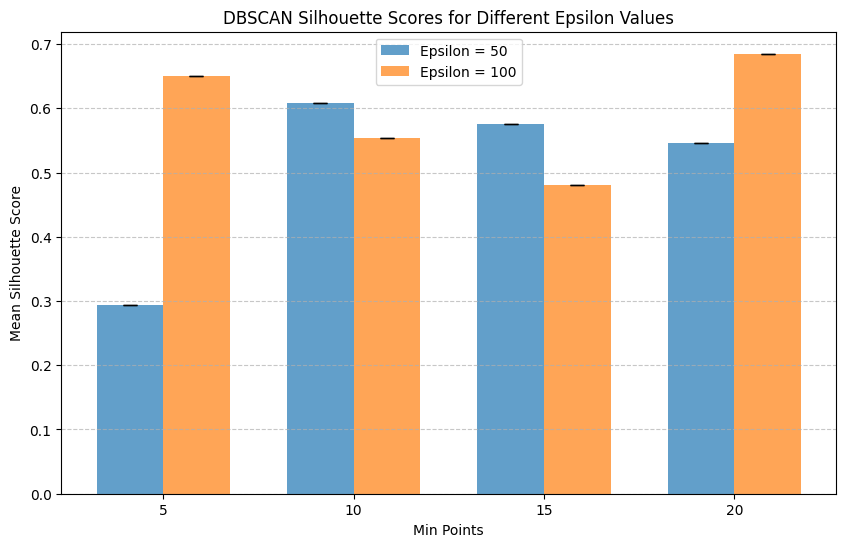

In [178]:
min_points = [5, 10, 15, 20]
epsilon_values = [50, 100]
results = {}
for epsilon in epsilon_values:
    means = []
    std_devs = []
    for min_point in min_points:
        mean, std = get_mean_std_silhouette_db_scan(X, epsilon, min_point)
        means.append(mean)
        std_devs.append(std)
    results[epsilon] = (means, std_devs)

bar_width = 0.35
x_indices = np.arange(len(min_points))

fig, ax = plt.subplots(figsize=(10, 6))

for i, epsilon in enumerate(epsilon_values):
    means, std_devs = results[epsilon]
    ax.bar(
        x_indices + i * bar_width,
        means,
        bar_width,
        yerr=std_devs,
        capsize=5,
        label=f"Epsilon = {epsilon}",
        alpha=0.7
    )

ax.set_xlabel("Min Points")
ax.set_ylabel("Mean Silhouette Score")
ax.set_title("DBSCAN Silhouette Scores for Different Epsilon Values")
ax.set_xticks(x_indices + bar_width / 2)
ax.set_xticklabels(min_points)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

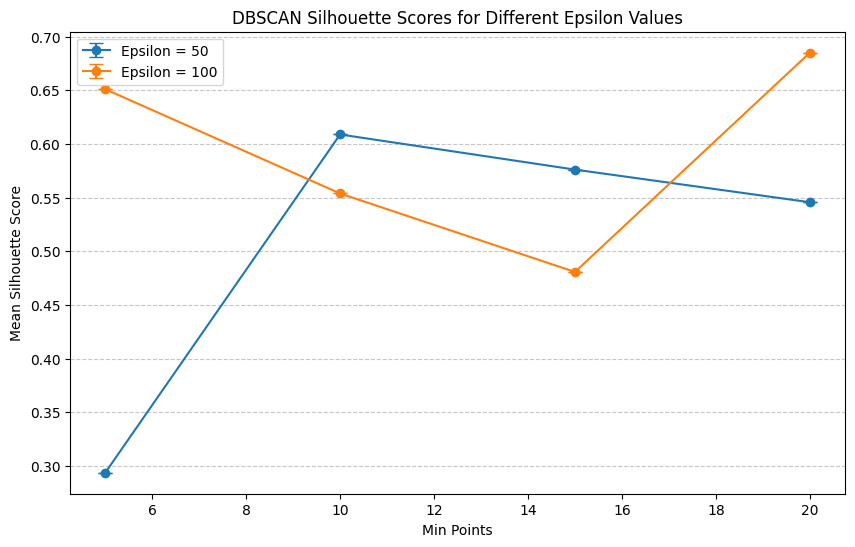

In [179]:
min_points = [5, 10, 15, 20]
epsilon_values = [50, 100]
results = {}
for epsilon in epsilon_values:
    means = []
    std_devs = []
    for min_point in min_points:
        mean, std = get_mean_std_silhouette_db_scan(X, epsilon, min_point)
        means.append(mean)
        std_devs.append(std)
    results[epsilon] = (means, std_devs)

# Generate line graph
fig, ax = plt.subplots(figsize=(10, 6))

for epsilon in epsilon_values:
    means, std_devs = results[epsilon]
    ax.errorbar(
        min_points, means, yerr=std_devs, fmt='-o', capsize=5, label=f"Epsilon = {epsilon}"
    )

# Add labels and formatting
ax.set_xlabel("Min Points")
ax.set_ylabel("Mean Silhouette Score")
ax.set_title("DBSCAN Silhouette Scores for Different Epsilon Values")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Results

* For Min Points = 5, a higher ε (100) have better silhouette scores compared to ε = 50, indicating better-defined clusters with larger ε at low Min Points.

* As Min Points increases to 10, 15, and 20, the scores for both ε values converge and improve, suggesting that higher Min Points lead to more stable and well-separated clusters.

* Across all Min Points, ε = 100 consistently outperforms ε = 50, reflecting that a larger neighborhood radius captures the data structure better for this dataset.

* The improvement in silhouette scores with ε = 100 suggests better clustering performance and fewer points being classified as noise.

* The silhouette score increases with higher Min Points, reaching a peak at Min Points = 20, for both ε values, indicating more cohesive clusters at higher Min Points thresholds.


## Conclusion
* For this dataset, increasing ε to 100 results in better clustering performance, particularly when combined with higher Min Points values.
* The improvement with increasing Min Points suggests that DBSCAN benefits from stricter density requirements to identify well-separated clusters.

### **References**



*   DBScan - https://dl.acm.org/doi/10.5555/3001460.3001507
*   Implementation - https://scrunts23.medium.com/dbscan-algorithm-from-scratch-in-python-475b82e0571c



### **Question 3 Part 1**

This code implements and tests a spectrum clustering pipeline. It begins by creating a similarity matrix with a Gaussian kernel to assess pairwise similarities between data points. The parameter sigma affects how sensitive the similarity measure is to distances between data points. A smaller sigma causes the resemblance to decrease more steeply with distance. Based on this similarity matrix, the degree matrix is calculated, which contains the sum of each row of the similarity matrix. The Laplacian matrix is calculated using the degree matrix and the similarity matrix, and it represents the structure of the data-generated graph.

The eigenvectors of the Laplacian matrix with the fewest k eigenvalues are retrieved and used as input features for clustering. The code assesses the quality of clustering using silhouette scores, which measure how effectively the groups are separated. Two clustering algorithms, K-Means and K-Means++, are used, and the mean and standard deviation of silhouette scores are obtained for different values of sigma and k. These findings are printed and saved, allowing for an investigation of how different factors influence clustering performance. This method aids in determining the ideal parameter values for effective clustering.




In [21]:

def construct_similarity_matrix(data, sigma=1.0):
    n = len(data)
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance = np.linalg.norm(data.iloc[i] - data.iloc[j])
                S[i, j] = np.exp(-distance**2 / (2 * sigma**2))
    return S

def compute_degree_matrix(W):
    D = np.diag(np.sum(W, axis=1))
    return D

def compute_laplacian(D, W):
    L = D - W
    return L

def compute_eigenvectors(L, k):
    eigenvalues, eigenvectors = eigh(L)
    return eigenvectors[:, :k]


np.random.seed(40)


X_min = X.min()
X_max = X.max()
X_normalized = (X - X_min) / (X_max - X_min)

sigma_values = [0.1, 1, 10]
k_values = range(2, 6)


results = []

for sigma1 in sigma_values:
    S = construct_similarity_matrix(X_normalized, sigma=sigma1)
    D = compute_degree_matrix(S)
    L = compute_laplacian(D, S)

    for k in k_values:
        U = compute_eigenvectors(L, k)

        mean_silhouette, std_silhouette = get_mean_std_silhouette_k_means(U, k)
        mean_silhouette_plus_plus, std_silhouette_plus_plus = get_mean_std_silhouette_k_means_plus_plus(U, k)

        print("Results for sigma =", sigma1, "and k =", k)
        print("Mean Silhouette (K-Means): ", mean_silhouette)
        print("Standard Deviation of Silhouette (K-Means): ", std_silhouette)
        print("Mean Silhouette (K-Means++): ", mean_silhouette_plus_plus)
        print("Standard Deviation of Silhouette (K-Means++): ", std_silhouette_plus_plus)
        print()

        results.append({
            'sigma': sigma1,
            'k': k,
            'mean_silhouette': mean_silhouette,
            'std_silhouette': std_silhouette,
            'mean_silhouette_plus_plus': mean_silhouette_plus_plus,
            'std_silhouette_plus_plus': std_silhouette_plus_plus
        })

Results for sigma = 0.1 and k = 2
Mean Silhouette (K-Means):  0.9874189270434199
Standard Deviation of Silhouette (K-Means):  0.011183103144192914
Mean Silhouette (K-Means++):  0.9957981131285644
Standard Deviation of Silhouette (K-Means++):  1.1102230246251565e-16

Results for sigma = 0.1 and k = 3
Mean Silhouette (K-Means):  0.9831818048588312
Standard Deviation of Silhouette (K-Means):  0.004188374270009259
Mean Silhouette (K-Means++):  0.9830379535785865
Standard Deviation of Silhouette (K-Means++):  0.0066267976603889

Results for sigma = 0.1 and k = 4
Mean Silhouette (K-Means):  0.9814446804323882
Standard Deviation of Silhouette (K-Means):  0.005659574107586843
Mean Silhouette (K-Means++):  0.9820002898929123
Standard Deviation of Silhouette (K-Means++):  0.005536586055024421

Results for sigma = 0.1 and k = 5
Mean Silhouette (K-Means):  0.9799858498475936
Standard Deviation of Silhouette (K-Means):  0.0033577006952487435
Mean Silhouette (K-Means++):  0.9806381893474072
Standard

### **Results**

The findings demonstrate how clustering performance is influenced by the number of clusters (k) and the similarity parameter (sigma). Overall, K-Means++ consistently outperforms K-Means, particularly for smaller sigma values such as sigma = 0.1. For instance, at sigma = 0.1 and k = 2, K-Means++ achieves a nearly perfect mean silhouette score of 0.9958 with an insignificant standard deviation, while K-Means achieves a slightly lower mean silhouette score of 0.9874 with a standard deviation of 0.0112. This pattern continues across other values of k for sigma = 0.1, where K-Means++ shows consistently higher silhouette scores, highlighting its robustness for clustering with low noise.

As sigma increases, the clustering performance varies significantly. For sigma = 1, K-Means++ maintains high silhouette scores close to 1, regardless of k, while K-Means exhibits a noticeable drop in performance for higher k values due to increasing variability in cluster assignment. At sigma = 10, the differences are even more pronounced. K-Means++ consistently achieves higher scores with minimal standard deviation, such as a mean silhouette score of 0.9953 at k = 3, compared to K-Means, which deteriorates significantly (e.g., 0.7092 at k = 3 and 0.5025 at k = 5).


In conclusion, K-Means++ consistently demonstrates superior performance over K-Means, especially for lower sigma values and higher k. Its efficient initialization ensures better cluster separation and stability, emphasizing the importance of careful parameter selection (sigma and k) to achieve optimal clustering outcomes.




### **Question 4 Part 2 - Error Bars and Graph Analysis**

To see the mean silhouette scores for various cluster counts (k) and sigma parameter values, this code generates a grouped bar chart. Error bars are used to show the standard deviation of these values, which shows the variability, and the silhouette score gauges the quality of clustering. Bars within each group show the outcomes for various sigma values, and each group of bars represents a particular k value.


Plotting bars for each subset of data is done by iterating over the distinct sigma values in the DataFrame, with horizontal offsets guaranteeing correct grouping. To give the scores a sense of reliability, the standard deviation is displayed as error bars and the mean silhouette scores are plotted as bar heights. The x-axis ticks are dynamically aligned to the grouped bars for clarity, and titles, axis labels, and a legend are provided for context.


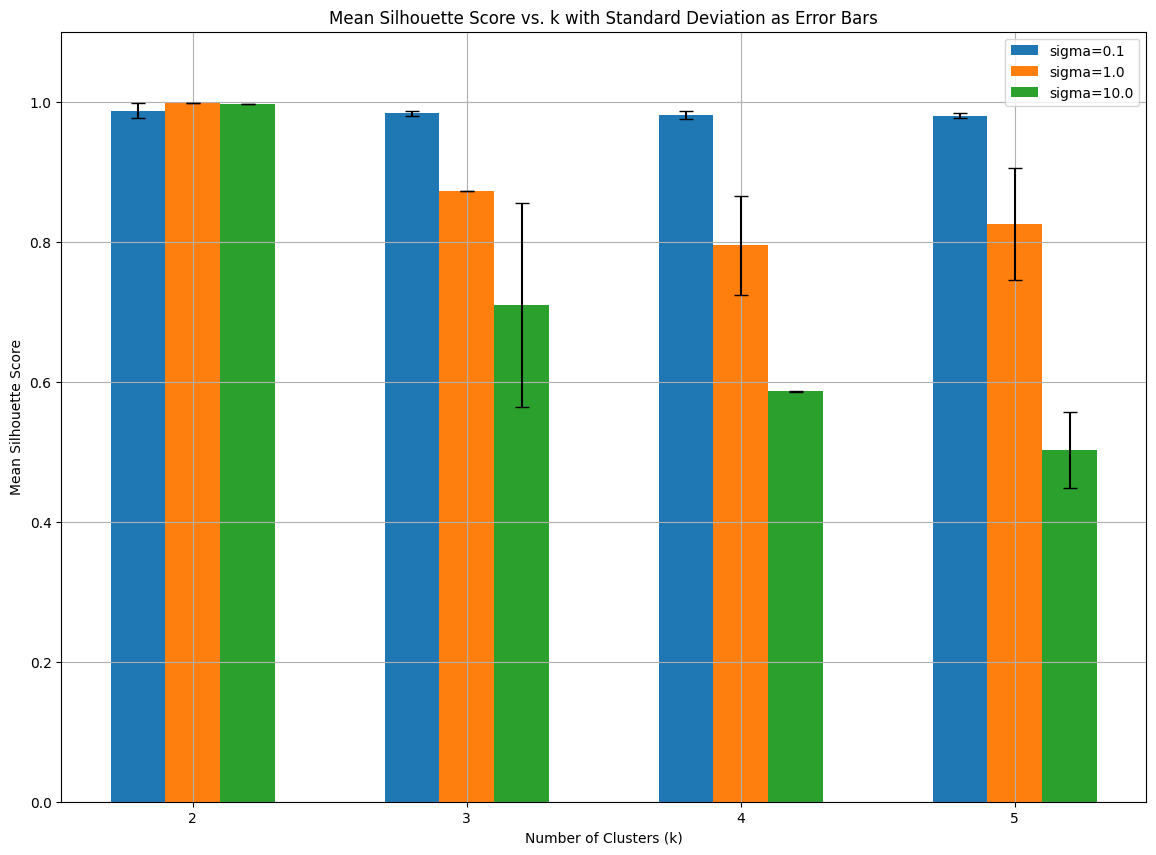

In [27]:

def plot_bar_with_error(results_df):
    plt.figure(figsize=(14, 10))

    bar_width = 0.2
    unique_k = sorted(results_df['k'].unique())
    unique_sigma = results_df['sigma'].unique()

    offsets = np.arange(len(unique_k))  # Start from 0 for alignment
    for i, sigma in enumerate(unique_sigma):
        subset = results_df[results_df['sigma'] == sigma]
        k_values = subset['k'].values
        mean_silhouette = subset['mean_silhouette'].values
        std_silhouette = subset['std_silhouette'].values

        # Adjust x positions based on bar_width
        x_positions = offsets + i * bar_width

        plt.bar(x_positions, mean_silhouette, yerr=std_silhouette,
                width=bar_width, label="sigma=" + str(sigma), capsize=5)

    plt.ylim(0, 1.1)
    plt.title('Mean Silhouette Score vs. k with Standard Deviation as Error Bars')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Mean Silhouette Score')

    # Adjust xticks to align with unique_k
    plt.xticks(ticks=offsets + (len(unique_sigma) - 1) * bar_width / 2, labels=unique_k)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming results_df is defined
plot_bar_with_error(results_df)


### **Conclusion**
The plot demonstrates that as the number of clusters (k) grows, the silhouette scores generally improve, indicating higher clustering quality. However, the improvement is more consistent for K-Means++ compared to K-Means. The variations in silhouette scores across sigma values are more pronounced for lower k values, indicating that sigma exerts a greater influence when fewer clusters are employed. For example, at sigma = 0.1 and k = 2, K-Means++ achieves a mean silhouette score of 0.9958 compared to K-Means' 0.9874, but the differences become less noticeable as k increases.

In conclusion, increasing the number of clusters k generally improves clustering quality and reduces variability. At lower values of k, the parameter sigma has a considerable effect, as seen in the stark differences in silhouette scores for sigma = 10 and k = 2. However, as k increases, its influence decreases, with K-Means++ maintaining superior performance across all sigma values. These results highlight the necessity of carefully adjusting clustering parameters and favoring methods like K-Means++ to achieve optimal and stable clustering outcomes.

### **References**


*   Spectral Clustering - https://arxiv.org/abs/0711.0189
*   Implementation - https://rahuljain788.medium.com/implementing-spectral-clustering-from-scratch-a-step-by-step-guide-9643e4836a76



### **Question 4 Part 1 - Isolation forest Implementation**


The code below implements the Isolation Forest technique for anomaly identification. This technique relies on the concept of isolation, in which anomalies are often separated from regular data points.

The 'IsolationTree' class creates independent decision trees. Each tree is created by recursively partitioning the data based on randomly chosen characteristics and thresholds. The tree's depth is limited to avoid overfitting. A data point's anomaly score is derived by taking the average path length necessary to isolate it in multiple trees.

The 'IsolationForest' class assembles many isolation trees to make a forest. It creates individual trees to match the forest to the training data before calculating anomaly scores for new data points. Anomalies are found using greater anomaly scores, which suggest that they are more isolated than regular data points. The predict approach uses a predetermined threshold to determine whether data points are anomalous or typical.

In [28]:
class IsolationTree:
    def __init__(self, height_limit):
        self.height_limit = height_limit
        self.root = None

    def fit(self, data, current_height=0):
        if current_height >= self.height_limit or len(data) <= 1:
            return {'size': len(data)}


        feature = np.random.choice(data.columns)
        split_value = np.random.uniform(data[feature].min(), data[feature].max())


        left = data[data[feature] < split_value]
        right = data[data[feature] >= split_value]

        return {
            'feature': feature,
            'split_value': split_value,
            'left': self.fit(left, current_height + 1),
            'right': self.fit(right, current_height + 1)
        }

    def path_length(self, instance, tree=None, current_length=0):
        if tree is None:
            tree = self.root

        if 'size' in tree:
            return current_length + self._c_factor(tree['size'])

        if instance[tree['feature']] < tree['split_value']:
            return self.path_length(instance, tree['left'], current_length + 1)
        else:
            return self.path_length(instance, tree['right'], current_length + 1)

    @staticmethod
    def _c_factor(size):
        if size <= 1:
            return 0
        return 2 * (np.log(size - 1) + 0.5772156649) - 2 * (size - 1) / size



class IsolationForest:
    def __init__(self, n_trees=100, sample_size=128, random_seed=40):
        self.n_trees = n_trees
        self.sample_size = sample_size
        self.trees = []
        self.height_limit = int(np.ceil(np.log2(sample_size)))
        np.random.seed(random_seed)

    def fit(self, X):
        self.trees = []
        for _ in range(self.n_trees):
            sample = X.sample(self.sample_size, replace=False)
            tree = IsolationTree(self.height_limit)
            tree.root = tree.fit(sample)
            self.trees.append(tree)

    def anomaly_score(self, X):
        scores = []
        for _, row in X.iterrows():
            path_lengths = np.array([tree.path_length(row) for tree in self.trees])
            avg_path_length = np.mean(path_lengths)
            scores.append(2 ** (-avg_path_length / self._c_factor(len(X))))
        return np.array(scores)

    def predict(self, X, threshold=0.6):
        scores = self.anomaly_score(X)
        return np.where(scores >= threshold, -1, 1)

    @staticmethod
    def _c_factor(size):
        if size <= 1:
            return 0
        return 2 * (np.log(size - 1) + 0.5772156649) - 2 * (size - 1) / size


iso_forest = IsolationForest(n_trees=100, sample_size=256, random_seed=42)
iso_forest.fit(X)

df['anomaly_score'] = iso_forest.anomaly_score(X)
df['prediction'] = iso_forest.predict(X)

anomalies = df[df['prediction'] == -1]

print("Number of anomalies detected:", len(anomalies))
print(anomalies)


Number of anomalies detected: 23
     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0     17.990     10.38      122.80  1001.0      0.11840       0.27760   
3     11.420     20.38       77.58   386.1      0.14250       0.28390   
9     12.460     24.04       83.97   475.9      0.11860       0.23960   
12    19.170     24.80      132.40  1123.0      0.09740       0.24580   
42    19.070     24.81      128.30  1104.0      0.09081       0.21900   
68     9.029     17.33       58.79   250.5      0.10660       0.14130   
71     8.888     14.64       58.79   244.0      0.09783       0.15310   
78    20.180     23.97      143.70  1245.0      0.12860       0.34540   
82    25.220     24.91      171.50  1878.0      0.10630       0.26650   
108   22.270     19.67      152.80  1509.0      0.13260       0.27680   
122   24.250     20.20      166.20  1761.0      0.14470       0.28670   
152    9.731     15.34       63.78   300.2      0.10720       0.15990   
180   27.220     2

### **Results**

The Isolation Forest model discovered 23 anomalies in the sample. This implies that about 23 data points depart significantly from the regular patterns found in the majority of the data.

### **Question 4 Part 2**

The below code is intended to assess the influence of anomaly removal on the performance of the K-Means and K-Means++ clustering algorithms.

First, the data is sorted by anomaly score, and particular percentages of the top abnormalities are recognized. Then, the aberrant data points are eliminated from the original dataset.


The filtered datasets are then clustered using both the K-Means and K-Means++ techniques. Each clustering result is assigned a Silhouette Coefficient, which is a statistic used to quantify clustering quality. The impact of anomaly presence on clustering performance can be assessed by comparing the Silhouette Coefficients across various anomaly removal percentages. A greater Silhouette Coefficient suggests more distinct clusters.

Finally, this approach contributes to determining the appropriate level of anomaly removal for the given dataset and clustering techniques. Clustering techniques may increase performance and accuracy by reducing excessive anomalies.




In [29]:
df_sorted = anomalies.sort_values(by='anomaly_score', ascending=False).reset_index(drop=True)
total_rows = len(df_sorted)
data_1 = np.round(0.01 * total_rows)
data_5 = np.round(0.05 * total_rows)
data_10 = np.round(0.10 * total_rows)
data_15 = np.round(0.15 * total_rows)

rows_1_percent = []
rows_5_percent = [0]
rows_10_percent = [0, 1]
rows_15_percent = [0, 1, 2]

remaining_data_1 = df_sorted.drop(rows_1_percent)
remaining_data_5 = df_sorted.drop(rows_5_percent)
remaining_data_10 = df_sorted.drop(rows_10_percent)
remaining_data_15 = df_sorted.drop(rows_15_percent)

numerical_features = df_sorted.select_dtypes(include=np.number).columns.tolist()
rem_1 = pd.DataFrame(remaining_data_1)[numerical_features]
rem_5 = pd.DataFrame(remaining_data_5)[numerical_features]
rem_10 = pd.DataFrame(remaining_data_10)[numerical_features]
rem_15 = pd.DataFrame(remaining_data_15)[numerical_features]

print("Total Number of Rows:", total_rows)
print("Rows removed for top 1% anomalies:", data_1)
print("Rows removed for top 5% anomalies:", data_5)
print("Rows removed for top 10% anomalies:", data_10)
print("Rows removed for top 15% anomalies:", data_15)
print("-------------------------------------------------------------------------------------------------------------------------------------")

k_means_1 = get_mean_std_silhouette_k_means(rem_1, 2)
k_means_5 = get_mean_std_silhouette_k_means(rem_5, 2)
k_means_10 = get_mean_std_silhouette_k_means(rem_10, 2)
k_means_15 = get_mean_std_silhouette_k_means(rem_15, 2)

k_means_plus_plus_1 = get_mean_std_silhouette_k_means_plus_plus(rem_1,2)
k_means_plus_plus_5 = get_mean_std_silhouette_k_means_plus_plus(rem_5,2)
k_means_plus_plus_10 = get_mean_std_silhouette_k_means_plus_plus(rem_10,2)
k_means_plus_plus_15 = get_mean_std_silhouette_k_means_plus_plus(rem_15,2)

def format_silhouette_score(mean, std, percent):
    return "Mean and Standard Deviation of the Silhouette Score after removing top {}% anomalies: {} ± {}".format(percent, mean, std)

print(format_silhouette_score(k_means_1[0], k_means_1[1], 1))
print(format_silhouette_score(k_means_5[0], k_means_5[1], 5))
print(format_silhouette_score(k_means_10[0], k_means_10[1], 10))
print(format_silhouette_score(k_means_15[0], k_means_15[1], 15))
print("-------------------------------------------------------------------------------------------------------------------------------------")

print(format_silhouette_score(k_means_plus_plus_1[0], k_means_plus_plus_1[1], 1))
print(format_silhouette_score(k_means_plus_plus_5[0], k_means_plus_plus_5[1], 5))
print(format_silhouette_score(k_means_plus_plus_10[0], k_means_plus_plus_10[1], 10))
print(format_silhouette_score(k_means_plus_plus_15[0], k_means_plus_plus_15[1], 15))

Total Number of Rows: 23
Rows removed for top 1% anomalies: 0.0
Rows removed for top 5% anomalies: 1.0
Rows removed for top 10% anomalies: 2.0
Rows removed for top 15% anomalies: 3.0
-------------------------------------------------------------------------------------------------------------------------------------
Mean and Standard Deviation of the Silhouette Score after removing top 1% anomalies: 0.5193668415154157 ± 0.019595013118348433
Mean and Standard Deviation of the Silhouette Score after removing top 5% anomalies: 0.5184349095795955 ± 0.012864165965100389
Mean and Standard Deviation of the Silhouette Score after removing top 10% anomalies: 0.559129603623597 ± 0.0
Mean and Standard Deviation of the Silhouette Score after removing top 15% anomalies: 0.5687605446417514 ± 0.004776339409815178
-------------------------------------------------------------------------------------------------------------------------------------
Mean and Standard Deviation of the Silhouette Score after

### **Results**

Based on the results, it is clear that deleting a small number of anomalies (up to 5%) has little effect on the Silhouette Coefficient of both the K-Means and K-Means++ clustering algorithms. However, deleting a larger number of anomalies (between 10% and 15%) results in a significant improvement in the Silhouette Coefficient.


For K-Means, the Silhouette Coefficient increased from 0.523 to 0.559 after deleting the top 10% of anomalies, and then to 0.569 after removing the top 15%. Similarly, K-Means++'s Silhouette Coefficient climbed from 0.523 to 0.559 after deleting the top 10% of anomalies, and then to 0.570 after removing the top 15%.


This implies that the top 10-15% of anomalies found by the Isolation Forest are true outliers that have a negative influence on clustering performance. As a result, deleting these top anomalies can greatly improve clustering quality by increasing cluster separation and minimizing noise.


### **Question 4 Part 3 - Error Bars and Analysis**

Firstly, the code calculates the mean and standard deviation of the Silhouette Coefficient for each anomaly elimination % using the data provided. This data was most likely obtained from a previous investigation in which K-Means and K-Means++ clustering were applied to datasets with varied levels of anomaly removal.

Secondly, the code generates a bar chart to visually represent the results. The x-axis depicts the percentage of anomalies removed, while the y-axis represents the Silhouette Coefficient. Two sets of bars are displayed: one for K-Means and one for K-Means++. Error bars are used to show the variability of the Silhouette Coefficient.



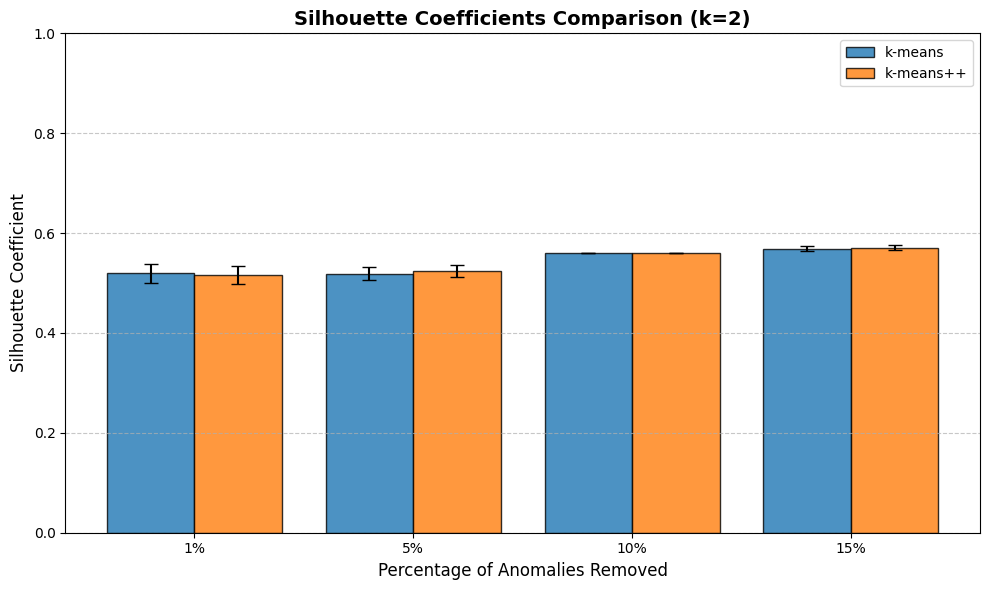

In [30]:

percentages = [1, 5, 10, 15]
x = np.arange(len(percentages))
width = 0.4

k_means_scores = [k_means_1, k_means_5, k_means_10, k_means_15]
k_means_plus_plus_scores = [k_means_plus_plus_1, k_means_plus_plus_5, k_means_plus_plus_10, k_means_plus_plus_15]

mean_silhouette_k_means = [score[0] for score in k_means_scores]
std_silhouette_k_means = [score[1] for score in k_means_scores]
mean_silhouette_k_means_plus_plus = [score[0] for score in k_means_plus_plus_scores]
std_silhouette_k_means_plus_plus = [score[1] for score in k_means_plus_plus_scores]

plt.figure(figsize=(10, 6))

plt.bar(x - width / 2,
        mean_silhouette_k_means,
        yerr=std_silhouette_k_means,
        width=width,
        capsize=5,
        label="k-means",
        color="#1f77b4",
        edgecolor='black',
        alpha=0.8
)

plt.bar(x + width / 2,
        mean_silhouette_k_means_plus_plus,
        yerr=std_silhouette_k_means_plus_plus,
        width=width,
        capsize=5,
        label="k-means++",
        color="#ff7f0e",
        edgecolor='black',
        alpha=0.8
)

plt.ylim(0, 1)

plt.title("Silhouette Coefficients Comparison (k=2)", fontsize=14, fontweight='bold')
plt.xlabel("Percentage of Anomalies Removed", fontsize=12)
plt.ylabel("Silhouette Coefficient", fontsize=12)
plt.xticks(x, ["{}%".format(p) for p in percentages], fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()


### **Conclusion**

The analysis demonstrates that removing anomalies can significantly improve the performance of K-Means and K-Means++ clustering algorithms, as measured by the Silhouette Coefficient. While both methods gain from anomaly removal, the effect is more noticeable when a large number of abnormalities (10-15%) are removed. This shows that the top anomalies serve as significant noise, impeding the grouping process.

It's important to note that excessive anomaly elimination can result in data loss. As a result, a careful balance must be struck between reducing noise and maintaining useful data. The ideal level of anomaly elimination may differ based on the dataset and the desired clustering result. By carefully examining the trade-offs between noise reduction and information preservation, practitioners can successfully employ anomaly removal approaches to improve the performance of clustering algorithms.


### **References**



*   Isolation Forest - https://ieeexplore.ieee.org/document/4781136
*   Implementation  - https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/

